# Advanced line detection

## Import packages

In [97]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
%matplotlib inline

## Camera Calibration

### Helper functions

In [185]:
# display image map
def plot_images_map(images, img_size=(20,15), columns=5):
    plt.figure(figsize=img_size)
    columns = 5

    i = 0
    for file_name in images:
        plt.subplot(len(images) / columns + 1, columns, i + 1).set_title(file_name)
        plt.imshow(images[file_name])
        i += 1

# function to find amount of corners
def find_possible_corners_dimension(file_name):
    image = mpimg.imread(file_name)
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

    for ny in range(3, 10):
        for nx in range(3, 10): 
            ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
            if ret == True:
                print(nx, ny)

### Load and display images for calibration:

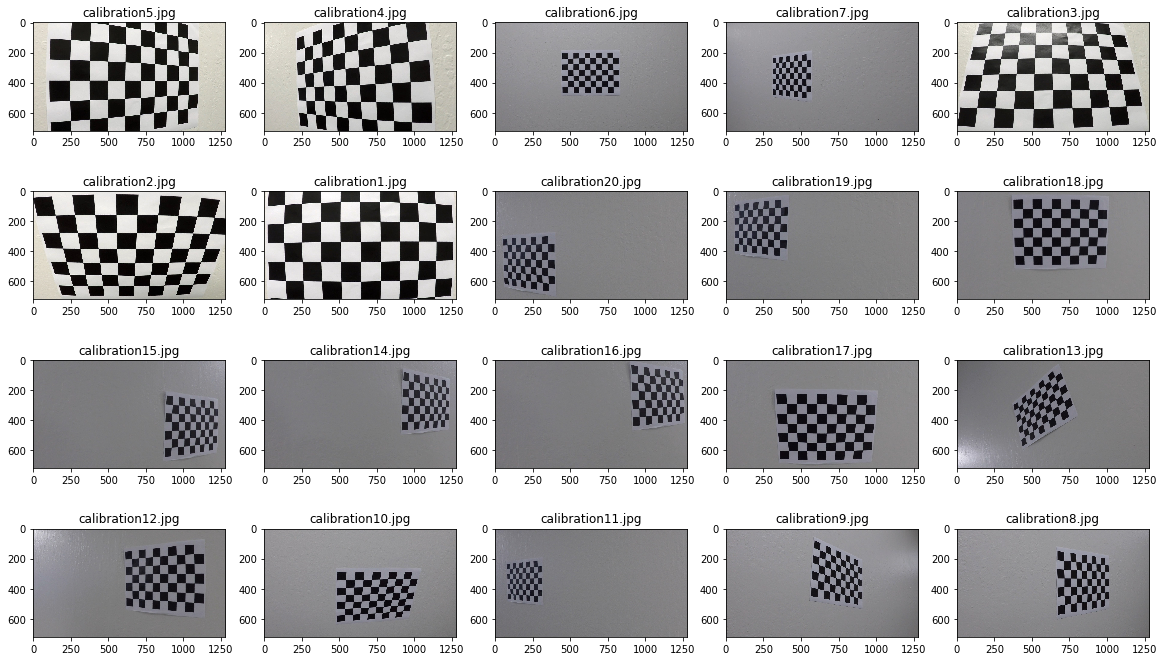

In [117]:
calibration_image_list = {}

for i,fileName in enumerate(os.listdir("camera_cal/")):
    image = mpimg.imread('camera_cal/' + fileName)
    calibration_image_list[fileName] = image
    
plot_images_map(calibration_image_list)

### Calibrate the camera

In [206]:
import glob
# read images for calibration 
calibration_image_list = glob.glob('camera_cal/calibration*.jpg')

# images with corners
images_with_corners = {}

# points collections
objpoints = []
imgpoints = []

nx_9_ny_6 = [
    'camera_cal/calibration2.jpg',
    'camera_cal/calibration3.jpg',
    'camera_cal/calibration6.jpg', 
    'camera_cal/calibration7.jpg', 
    'camera_cal/calibration8.jpg',
    'camera_cal/calibration9.jpg',
    'camera_cal/calibration10.jpg', 
    'camera_cal/calibration11.jpg',
    'camera_cal/calibration12.jpg',
    'camera_cal/calibration13.jpg', 
    'camera_cal/calibration14.jpg',
    'camera_cal/calibration15.jpg',
    'camera_cal/calibration16.jpg', 
    'camera_cal/calibration17.jpg',
    'camera_cal/calibration18.jpg',
    'camera_cal/calibration19.jpg',
    'camera_cal/calibration20.jpg', 
]

nx_9_ny_5 = [
    'camera_cal/calibration1.jpg'
]

nx_7_ny_6 = [
    'camera_cal/calibration5.jpg'
]

nx_5_ny_7 = [
    'camera_cal/calibration4.jpg'
]

for file_name in calibration_image_list:
    # nx corners in x dimension 
    # ny corners in y dimension 
    if file_name in nx_9_ny_6 :
        nx = 9
        ny = 6
    elif file_name in nx_9_ny_5 :
        nx = 9
        ny = 5
    elif file_name in nx_7_ny_6 :
        nx = 7
        ny = 6
    elif file_name in nx_5_ny_7 :
        nx = 5
        ny = 7
    else:
        raise Exception("unknown file name ", file_name)
    
        
    # prepare object points
    objp = np.zeros((nx*ny, 3), np.float32)
    objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2)

    # read image
    image = mpimg.imread(file_name)

    # conver to grayscale
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

    # try to find a corners 
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

    # if found, draw corners
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)

        # draw and display the corners
        cv2.drawChessboardCorners(image, (nx, ny), corners, ret)
        images_with_corners[file_name] = image
    else: 
        print(file_name, nx , ny)
        
undistored_images = {}

# undistort calibration images
for file_name in images_with_corners:
    image = mpimg.imread(file_name)
    
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)    
    undistored_images[file_name] = cv2.undistort(image, mtx, dist, None, mtx) 

print("found ", len(images_with_corners), "image(s) with corners in ", len(calibration_image_list), "images and undistored ", len(undistored_images))    

found  20 image(s) with corners in  20 images and undistored  20


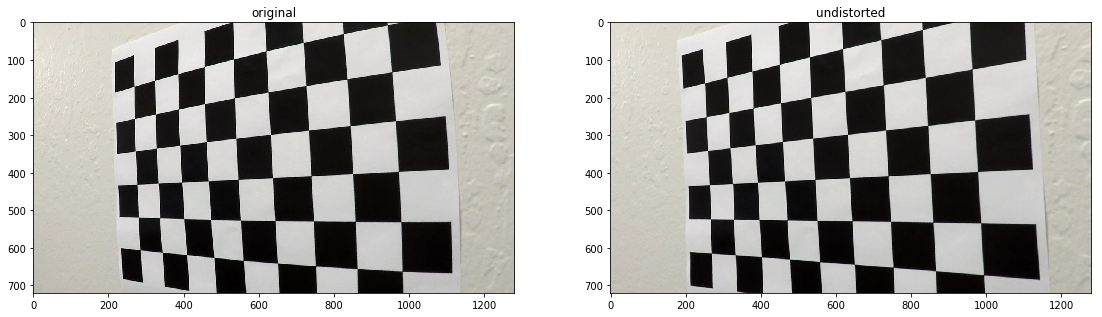

In [208]:
# plot big images of "original" and "undistorted" for "camera_cal/calibration4.jpg"
image = mpimg.imread("camera_cal/calibration4.jpg")

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)    
undistorted = cv2.undistort(image, mtx, dist, None, mtx)
plot_images_map({"original" : image, "undistorted" : undistorted}, columns=2, img_size=(50, 10))


### Show images with cornes

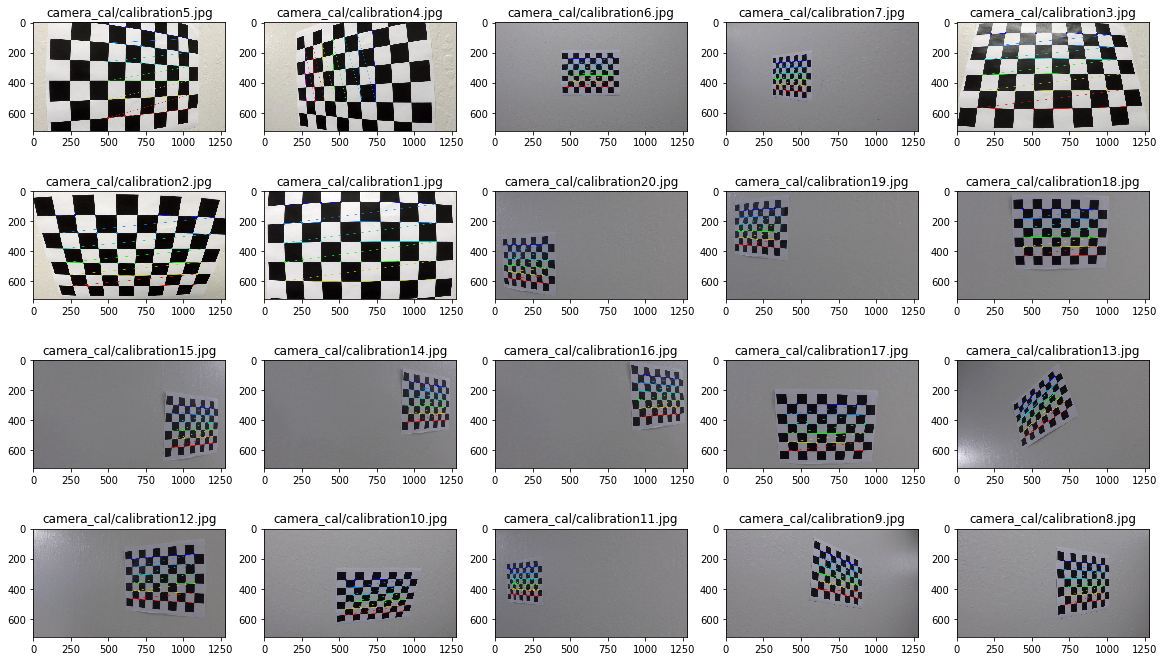

In [202]:
plot_images_map(images_with_corners)

### Show undistored images 

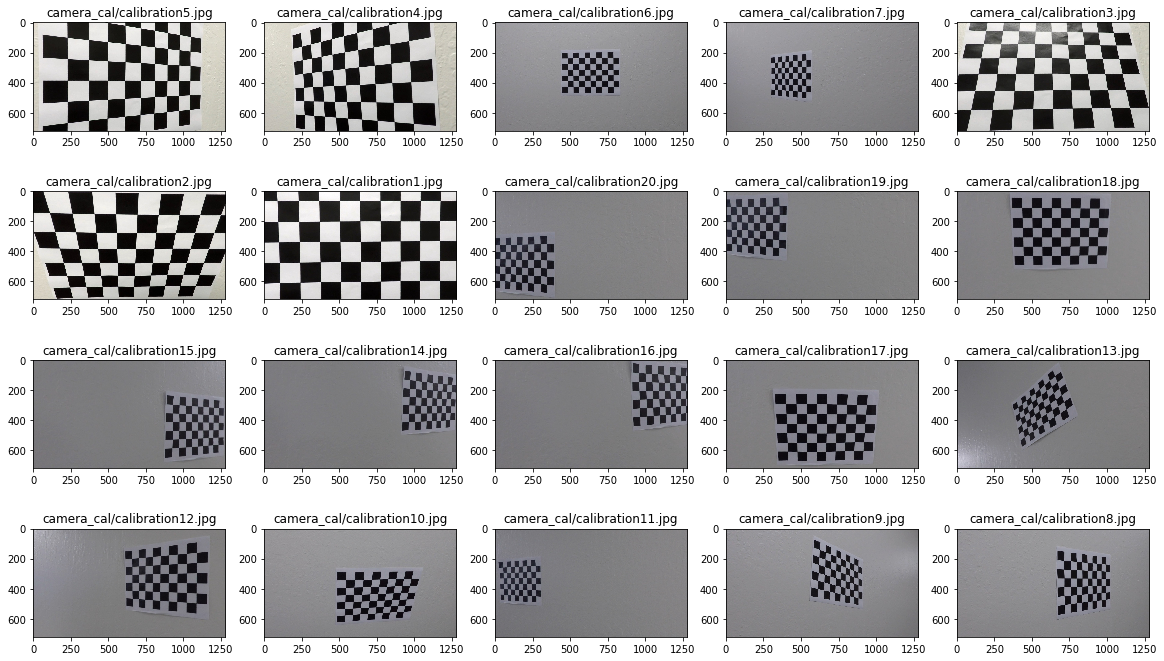

In [203]:
plot_images_map(undistored_images)

error: OpenCV(3.4.2) /opt/concourse/worker/volumes/live/9523d527-1b9e-48e0-7ed0-a36adde286f0/volume/opencv-suite_1535558719691/work/modules/calib3d/src/calibration.cpp:3384: error: (-215:Assertion failed) nimages > 0 in function 'calibrateCamera'
